# Thermal Tutorial 

When starting an image-based phenotyping project it is important to consider what the end goals of the project are.
This is important because the goals of the project will determine the the camera type, imaging layout, and will help to 
guide downstream analysis. For example, if the goal of the project is to quantify the growth rates of a population of 
Arabidopsis plants, you may want to take timelapse images of whole flats of plants with an RGB (VIS) camera.

To run a VIS workflow over a single VIS image there are two required inputs:

1.  **Image:** Images can be processed regardless of what type of VIS camera was used (high-throughput platform, digital camera, cell phone camera).
Image processing will work with adjustments if images are well lit and free of background that is similar in color to plant material.  
2.  **Output directory:** If debug mode is set to 'print' output images from each step are produced.


In [1]:
import cv2
from plantcv import plantcv as pcv


In [2]:
class options:
    def __init__(self):
        self.image = "./img/thermal_data.csv"
        self.debug = "plot"
        self.writeimg= False
        self.result = "thermal_tutorial_results.txt"
        self.outdir = "."
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug


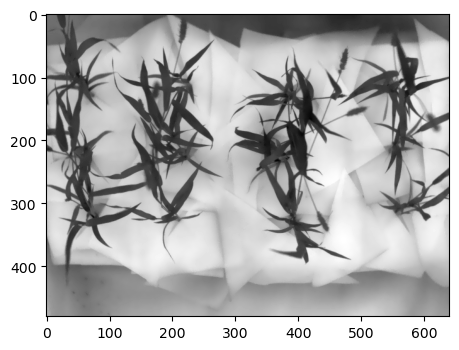

In [3]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
thermal_data, path, filename = pcv.readimage(filename=args.image, mode='csv')


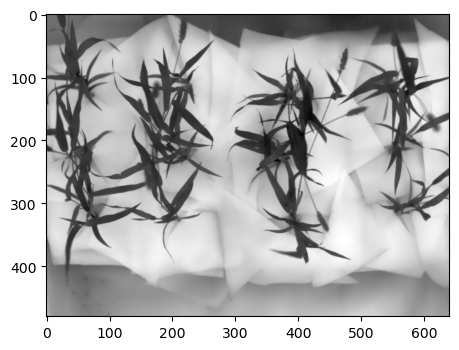

In [4]:
# Rescale the thermal data to a colorspace with range 0-255 rather than raw data 
    
# Inputs:
#   gray_img - Grayscale image data 
#   min_value - New minimum value for range of interest. default = 0
#   max_value - New maximum value for range of interest. default = 255
scaled_thermal_img = pcv.transform.rescale(gray_img=thermal_data)


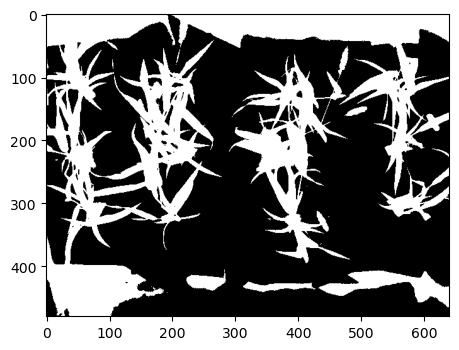

In [5]:
# Threshold the thermal data to make a binary mask
    
# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than the background then standard 
#                 threshold is done. If the object is darker than the background then inverse thresholding is done. 
bin_mask = pcv.threshold.binary(gray_img=thermal_data, threshold=35, max_value=255, object_type='dark')


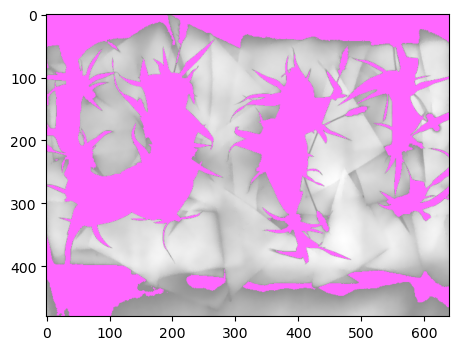

In [6]:
# Identify objects
    
# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
id_objects, obj_hierarchy = pcv.find_objects(img=scaled_thermal_img, mask=bin_mask)


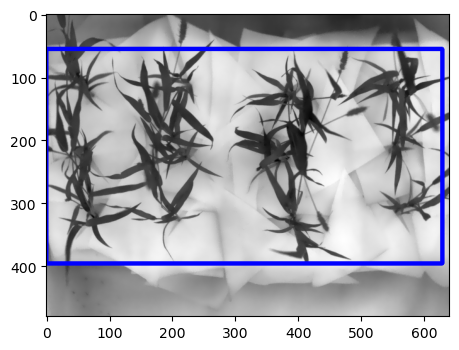

In [7]:
# Define the region of interest (ROI) 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
roi, roi_hierarchy= pcv.roi.rectangle(img=scaled_thermal_img, x=0, y=55, h=342, w=630)


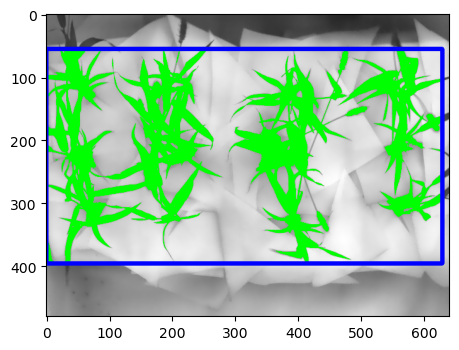

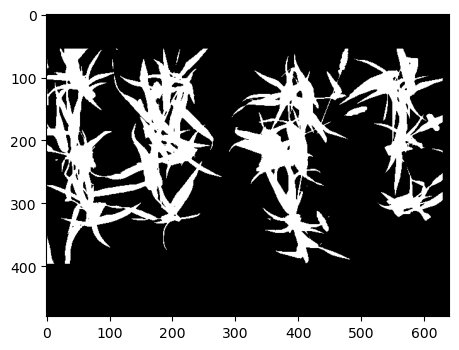

In [8]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)
roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img=scaled_thermal_img,roi_contour=roi,
                                                              roi_hierarchy=roi_hierarchy,
                                                              object_contour=id_objects,
                                                              obj_hierarchy=obj_hierarchy, 
                                                              roi_type='cutto')


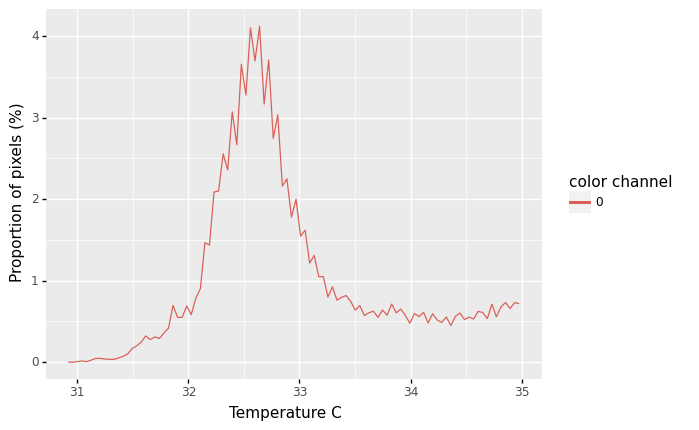

In [9]:
##### Analysis #####

# Analyze thermal data 

# Inputs:
#   img - Array of thermal values
#   mask - Binary mask made from selected contours
#   histplot - If True plots histogram of intensity values (default histplot = False)
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

analysis_img = pcv.analyze_thermal_values(thermal_array=thermal_data, mask=kept_mask, histplot=True, label="default")


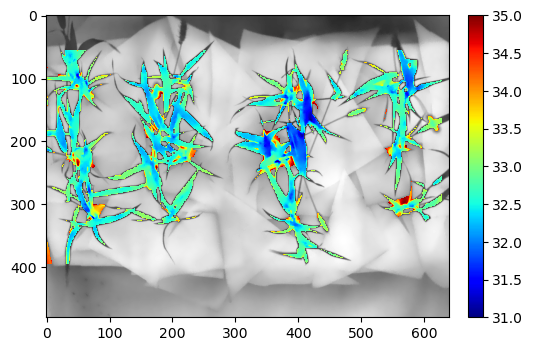

In [10]:
# Pseudocolor the thermal data 

# Inputs:
#     gray_img - Grayscale image data
#     obj - Single or grouped contour object (optional), if provided the pseudocolored image gets 
#           cropped down to the region of interest.
#     mask - Binary mask (optional) 
#     background - Background color/type. Options are "image" (gray_img, default), "white", or "black". A mask 
#                  must be supplied.
#     cmap - Colormap
#     min_value - Minimum value for range of interest
#     max_value - Maximum value for range of interest
#     dpi - Dots per inch for image if printed out (optional, if dpi=None then the default is set to 100 dpi).
#     axes - If False then the title, x-axis, and y-axis won't be displayed (default axes=True).
#     colorbar - If False then the colorbar won't be displayed (default colorbar=True)
pseudo_img = pcv.visualize.pseudocolor(gray_img = thermal_data, mask=kept_mask, cmap='jet', 
                                       min_value=31, max_value=35)


In [11]:
# Write thermal data to results file

# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
pcv.outputs.save_results(filename=args.result)


To view and/or download the text file output (saved in JSON format)...
1) To see the text file with data that got saved out, click “File” tab in top left corner.
2) Click “Open…”
3) Open the file named “thermal_tutorial_results.txt”

Check out documentation on how to [convert JSON](https://plantcv.readthedocs.io/en/latest/tools/#convert-output-json-data-files-to-csv-tables) format output into table formatted output. Depending on the analysis steps a PlantCV user may have two CSV files (single value traits and multivalue traits). 
